## 08_exercises

### 08-1

Populating the interactive namespace from numpy and matplotlib
             0         1          2
0    32.929879  4.269719   9.225849
1    23.324711  5.995988   0.032037
2    23.745846  5.518906   4.047200
3    29.359765  9.167008   5.724302
4    32.990468  3.610715   3.760764
..         ...       ...        ...
995  24.864502  4.532231  18.814633
996  36.159867  3.848419  17.799093
997  39.861891  3.028192  21.160710
998  37.971242  8.680566   8.921082
999  25.650902  4.747667   3.595396

[1000 rows x 3 columns]


/opt/conda/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['test', 'random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


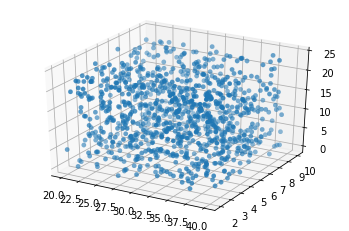

In [119]:
%pylab inline
import sklearn
import random
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd




tuples = [(random.uniform(20,40),random.uniform(2,10),random.uniform(0,24)) for n in range(0,1000)]
#print(tuples)
df = pd.DataFrame(tuples)
print(df)
x, y, z = df[:][0], df[:][1], df[:][2]


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, linewidth=0.2)

plt.show()

             0          1          2
0    39.167424  12.519008  22.932338
1    29.440629   8.797463  12.315829
2    17.051604   3.773981   1.777148
3    33.644329   9.921679  14.451745
4    17.722281   4.100843   2.273448
..         ...        ...        ...
995  17.491322   4.222782   0.611073
996  18.923345   4.922501   3.053526
997  18.766809   4.596618   2.207111
998  31.101800  10.375412  14.158090
999  16.443550   3.372058   0.009058

[1000 rows x 3 columns]


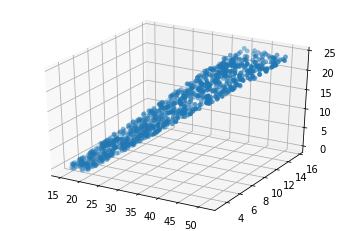

In [36]:
def create(count):
    babies = []
    for n in range(count):
        age = random.uniform(0,24)
        height = random.uniform(15*((age/15)+1),20*((age/15)+1))
        weight = random.uniform(3*((age/8)+1),4*((age/8)+1))
        babies.append((height, weight, age))
    return babies

df = pd.DataFrame(create(1000))
print(df)
x, y, z = df[:][0], df[:][1], df[:][2]


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, linewidth=0.2)

plt.show()


In [120]:
from sklearn.linear_model import LinearRegression

TRAINING_X = [random.randrange(0,10) for a in range(0,1000)]
npx = np.array(TRAINING_X)

TRAINING_Y = [10-TRAINING_X[a] for a in range(0,1000)]
npy = np.array(TRAINING_Y)

npx = npx.reshape(-1,1)


predictor = LinearRegression(n_jobs=-1)
predictor.fit(X=npx, y=npy)

test = np.array([y]).reshape(-1,1)
out = predictor.predict(X=test)
coef = predictor.coef_

print(f'Outcome : {out}\nCoefficients : {coef}')

Outcome : [5.73028125e+00 4.00401210e+00 4.48109424e+00 8.32992348e-01
 6.38928455e+00 6.54550916e+00 7.12525973e+00 6.16652271e+00
 3.11490658e+00 2.96987300e+00 8.10696863e-01 6.93308596e+00
 2.89256331e+00 7.56199619e-01 2.57793917e+00 2.71560256e+00
 2.29006652e+00 6.48207007e+00 8.39844525e-01 7.48753348e+00
 7.04435663e+00 1.29775919e+00 6.42264938e-01 7.01869913e+00
 6.84193599e+00 5.45353219e+00 7.23105750e+00 7.96155571e+00
 6.06505476e+00 7.67789227e+00 2.33600125e+00 4.33485865e+00
 5.59632967e+00 1.28623948e+00 5.50810083e+00 1.13420123e+00
 7.84028736e+00 4.06960634e+00 8.70180304e-01 9.97731277e-01
 5.63167301e+00 7.33744302e+00 5.93255775e+00 5.84242239e+00
 8.02577752e-01 3.39269680e+00 4.91020277e+00 7.42356729e+00
 7.17857649e+00 3.20105342e+00 7.46974401e+00 2.31197026e+00
 7.05546419e-01 5.43563177e-01 1.32252437e+00 8.36938698e-01
 6.47724868e+00 1.45152170e-02 5.73926019e+00 3.23159785e+00
 5.74657375e+00 2.74326909e+00 7.92247065e+00 3.04554079e+00
 2.70965508e+0

In [88]:
shoppers = {
'Paula':{'Is':4,'Juice':2,'Kakao':3,'Lagkager':2},
'Peter':{'Is':2,'Juice':5,'Kakao':0, 'Lagkager':4},
'Pandora':{'Is':5,'Juice':3, 'Kakao':4, 'Lagkager':5},
'Pietro':{'Is':1,'Juice':8, 'Kakao':9, 'Lagkager':1}
}
shop_prices = {
    'Netto': {'Is':10.50,'Juice':2.25,'Kakao':4.50,'Lagkager':33.50},
    'Fakta': {'Is':4.00,'Juice':4.50,'Kakao':6.25,'Lagkager':20.00}
}




print(pd.DataFrame(shoppers).T)
pdshoppers = pd.DataFrame(shoppers).T

print(pd.DataFrame(shop_prices))

buy = pd.DataFrame(shoppers).T.to_numpy()
sell = pd.DataFrame(shop_prices).to_numpy()


calc = buy.dot(sell)

print(calc)

for n in range(0,buy.shape[0]):
    if calc[n,0] < calc[n,1]:
        shop = 'Netto'
    elif calc[n,0] > calc[n,1]:
        shop = 'Fakta'
    else:
        shop = 'either store'
    print(f'{pdshoppers.index[n]} should buy groceries at {shop}')


         Is  Juice  Kakao  Lagkager
Paula     4      2      3         2
Peter     2      5      0         4
Pandora   5      3      4         5
Pietro    1      8      9         1
          Netto  Fakta
Is        10.50   4.00
Juice      2.25   4.50
Kakao      4.50   6.25
Lagkager  33.50  20.00
[[127.    83.75]
 [166.25 110.5 ]
 [244.75 158.5 ]
 [102.5  116.25]]
Paula should buy groceries at Fakta
Peter should buy groceries at Fakta
Pandora should buy groceries at Fakta
Pietro should buy groceries at Netto


## 8-03

In [116]:
from sklearn.feature_extraction.text import CountVectorizer

with open('../data/moby_dick.txt') as file_object:
    contents = [file_object.read()]

vectorizer = CountVectorizer()
fit = vectorizer.fit_transform(contents)

res = fit.todense() # returns a numpy array of same shape
idx = vectorizer.vocabulary_['wood']
print(res.shape)
print(res[0,17232])
print(idx2)

wood_count = sum(res[:,idx])

(1, 17409)
37
916


In [125]:
xs = np.array([6.2, 6.5, 5.48, 6.54, 7.18, 7.93])
xs = xs.reshape(-1, 1)
ys = np.array([26.3, 26.65, 25.03, 26.01, 27.9, 30.47])
model = sklearn.linear_model.LinearRegression()
model.fit(xs, ys)
model.predict(np.array([9]).reshape(-1,1))

array([32.22232152])